In [234]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import json
import math
from geopy import distance

In [2]:
d1 = pd.read_excel("./Батч 1.xlsx")
d2 = pd.read_excel("./Батч 2.xlsx")
d3 = pd.read_excel("./Батч 3.xlsx")
d4 = pd.read_excel("./Батч 4.xlsx")
d5 = pd.read_excel("./Батч 5.xlsx")

In [19]:
data = pd.concat([d1,d2,d3,d4,d5], ignore_index=True)
data = data.fillna(0)

In [20]:
data.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False
1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False
3,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False
4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False


In [21]:
sender_index = list(data['индекс отправителя'])

In [22]:
receiver_index = list(data['индекс получателя'])

In [23]:
sender_index[:10]

[109469,
 390039,
 111250,
 105173,
 195197,
 188300,
 367014,
 111672,
 367014,
 367018]

In [24]:
index = sender_index + receiver_index

In [25]:
index[:10]

[109469,
 390039,
 111250,
 105173,
 195197,
 188300,
 367014,
 111672,
 367014,
 367018]

In [26]:
with open("postal_code", "w") as f:
    print(index, file=f, flush=True)

In [27]:
data["kek"] = data["hid"].apply(lambda x: len(str(x)))

In [28]:
data.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False,36
1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,36
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36
3,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,7
4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,36


In [29]:
set(data["kek"])

{6, 7, 36}

In [30]:
data[data["kek"] == 7].head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
3,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,7
9,4145992,2020-07-05 00:21:59.948000,367018,173025,1000.0,421.9,2800.0,0.0,False,False,False,False,True,False,False,0,False,False,7
20,3320826,2020-07-05 00:06:11.796000,142290,169712,500.0,263.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,7
74,1024014,2020-07-05 00:11:14.668000,344012,169225,500.0,274.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,7
175,6021598,2020-07-05 00:43:03.666000,143026,117198,200.0,194.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,7


In [31]:
data[data["kek"] == 6]

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
69,628616,2020-07-05 00:06:24.068000,392027,628456,600.0,308.00,0.0,0.0,True,False,False,False,False,False,False,0,False,False,6
129,716538,2020-07-05 00:39:42.991000,150042,462360,2800.0,388.00,0.0,0.0,False,False,False,False,False,False,False,0,False,False,6
337,399754,2020-07-05 03:44:03.789000,676856,665827,3708.0,614.68,1000.0,0.0,True,False,False,False,True,False,False,0,False,False,6
547,799282,2020-07-05 05:33:06.681000,630133,360015,200.0,238.00,0.0,0.0,False,False,True,False,False,False,False,0,False,False,6
550,799282,2020-07-05 05:36:20.242000,630133,602266,350.0,350.00,0.0,0.0,False,False,True,False,False,False,False,0,False,False,6
565,799282,2020-07-05 05:46:32.277000,630133,601505,300.0,350.00,0.0,0.0,False,False,True,False,False,False,False,0,False,False,6
572,799282,2020-07-05 06:00:40.796000,630133,606044,600.0,486.00,0.0,0.0,False,False,True,False,False,False,False,0,False,False,6
643,508758,2020-07-05 06:16:35.359000,107241,617120,1000.0,288.00,0.0,0.0,True,False,False,False,False,False,False,0,False,False,6
681,391914,2020-07-05 06:34:00.801000,355012,171842,3000.0,388.00,0.0,0.0,False,False,False,False,False,False,False,0,False,False,6
714,391914,2020-07-05 06:52:16.401000,355012,646670,1000.0,308.00,0.0,0.0,False,False,False,False,False,False,False,0,False,False,6


In [32]:
six = data[data["kek"] == 6]
seven = data[data["kek"] == 7]
thirtysix = data[data["kek"] == 36]

In [33]:
print(f"6: {six.shape[0]}, 7: {seven.shape[0]}, 36: {thirtysix.shape[0]}")

6: 17316, 7: 59017, 36: 868234


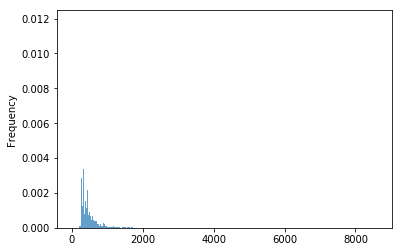

In [43]:
ax = data['стоимость (руб,коп)'].plot.hist(bins=1000, alpha=0.7, density=1, subplots=4)
plt.show()

In [44]:
data['стоимость (руб,коп)'].describe()

count    944567.000000
mean        407.635540
std         294.522514
min           0.000000
25%         263.000000
50%         316.000000
75%         458.860000
max        8586.360000
Name: стоимость (руб,коп), dtype: float64

In [46]:
data.columns

Index(['hid', 'дата оформления', 'индекс отправителя', 'индекс получателя',
       'вес (гр)', 'стоимость (руб,коп)', 'сумма ОЦ (руб)', 'сумма НП (руб)',
       'безбланковая отправка', 'бандероль', 'ускоренное', 'международное',
       'с объявл. ценностью', 'с налож. платежом', 'с описью вложений',
       'отметка 'Осторожно'', 'sms для отправителя', 'sms для получателя',
       'kek'],
      dtype='object')

In [53]:
data_cost = data[data['сумма ОЦ (руб)' ]> 0]
data_res = data_cost[data_cost['отметка \'Осторожно\''] == 0]
print(data_res.shape[0])
data_res.head()

241235


,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
9,4145992,2020-07-05 00:21:59.948000,367018,173025,1000.0,421.90,2800.0,0.0,False,False,False,False,True,False,False,0,False,False,7
29,161c1ccd-68bf-4a6d-9c7e-5651dc7f76a0,2020-07-05 00:30:40.253000,111675,680012,1000.0,605.24,2840.0,2840.0,True,False,True,False,True,True,False,0,False,False,36
32,161c1ccd-68bf-4a6d-9c7e-5651dc7f76a0,2020-07-05 00:33:15.744000,111675,693006,1000.0,587.24,2340.0,2340.0,True,False,True,False,True,True,False,0,False,False,36
38,171f9245-bdcc-4b96-82da-bf9ff70b5f91,2020-07-05 00:46:28.889000,241022,357981,1500.0,313.04,1.0,0.0,False,False,False,False,True,False,False,0,False,False,36
49,172e830c-f4ae-4ac0-847b-cab08689f96a,2020-07-05 00:00:20.450000,192177,398002,500.0,640.67,7852.0,7852.0,True,False,True,False,True,True,False,0,False,False,36


In [55]:
data[data['международное'] != False]

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek


In [57]:
kek = data.copy()
kek.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False,36
1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,36
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36
3,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,7
4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,36


In [64]:
lel = kek.drop(['международное', 'бандероль','hid', 'дата оформления', 'индекс отправителя', 'индекс получателя', 'kek' ], axis=1)


,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,ускоренное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя
0,100.0,173.0,0.0,0.0,False,True,False,False,False,0,False,False
1,1100.0,238.0,0.0,0.0,True,False,False,False,False,0,False,False
2,100.0,173.0,0.0,0.0,True,True,False,False,False,0,False,False
3,2262.0,363.0,0.0,0.0,False,False,False,False,False,0,False,False
4,1905.0,338.0,0.0,0.0,False,False,False,False,False,0,False,False


In [75]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(lel)
zez = data.copy()
zez['leb'] = kmeans.labels_

In [76]:
zez.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek,leb
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False,36,0
1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,36,0
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36,0
3,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,7,0
4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,36,0


In [74]:
from collections import Counter
c = Counter()
for x,y in zez.iterrows():
    c[y['leb']] += 1
c

Counter({0: 648579, 4: 52932, 1: 147960, 2: 85673, 3: 9423})

In [77]:
data['вес (гр)'].describe()

count    944567.000000
mean       1941.543764
std        2774.069269
min           0.000000
25%         305.000000
50%         883.000000
75%        2206.000000
max       20000.000000
Name: вес (гр), dtype: float64

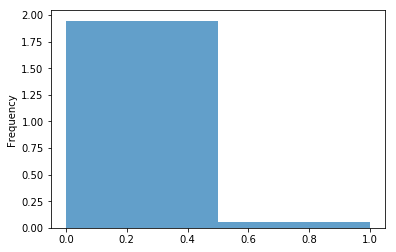

In [83]:
kek = data['sms для отправителя'].apply(lambda x: int(x))
ax = kek.plot.hist(bins=2, alpha=0.7, density=1, subplots=4)
plt.show()

In [85]:
data_cost = data[data['sms для получателя'] == False]
data_res = data_cost[data_cost['ускоренное'] == True]
print(data_res.shape[0])
data_res.head()

158444


,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False,36
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36
6,16d6c2ce-7d1c-4319-85e9-bf244d1bb3a1,2020-07-05 00:16:35.251000,367014,368850,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36
8,16d6c2ce-7d1c-4319-85e9-bf244d1bb3a1,2020-07-05 00:18:58.494000,367014,368034,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36
10,16d6c2ce-7d1c-4319-85e9-bf244d1bb3a1,2020-07-05 00:22:34.843000,367014,361045,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,36


In [87]:
data_cost = data[data['sms для отправителя'] == False]
data_cost.shape

(918979, 19)

In [90]:
data_cost = data[data['с описью вложений'] ==False]
data_kek = data_cost[data_cost['сумма НП (руб)'] > 0]
data_cost.shape

(937002, 19)

In [102]:
geo = data.copy()

In [93]:
with open("i2c.json", "r") as f:
    i2c = json.load(f)

In [123]:
for x,y in i2c.items():
    print(x, y)
    print(type(x))
    break

623638 [64.0674591, 57.1843206]
<class 'str'>


In [136]:
geo["from"] = geo['индекс отправителя'].apply(lambda x: tuple(i2c.get(str(x), ())))

In [137]:
geo["to"] = geo['индекс получателя'].apply(lambda x: tuple(i2c.get(str(x), ())))

In [143]:
geo_kek = geo[geo["from"] != ()]
geo_final = geo_kek[geo_kek["to"] != ()]

In [235]:
geo_final.head()
dist = []
for ind, row in geo_final.iterrows():
    #tmp = (row["from"][0] - row["to"][0]) ** 2 + (row["from"][1] - row["to"][1]) ** 2
    #tmp = math.sqrt(tmp) * 111
    a = (row["from"][1], row["from"][0])
    b = (row["to"][1], row["to"][0])
    tmp = distance.distance(a, b).km
    dist.append(tmp)
geo_final["dist"] = dist

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [236]:
geo_close = geo_final[geo_final["dist"] < 100]

In [237]:
geo_close.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,...,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek,from,to,dist
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.00,0.0,0.0,False,False,...,False,False,False,0,False,False,36,"(37.765346, 55.6516094)","(37.7903502, 55.8137977)",18.125747
11,16d6c2ce-7d1c-4319-85e9-bf244d1bb3a1,2020-07-05 00:23:25.732000,367014,368627,100.0,173.00,0.0,0.0,True,False,...,False,False,False,0,False,False,36,"(47.4285822, 42.971386)","(48.0359311, 42.1916733)",99.938616
91,165777a5-4859-4eb1-ba33-eee63cc049f5,2020-07-05 00:17:42.934000,117570,117198,240.0,194.00,0.0,0.0,False,False,...,False,False,False,0,False,False,36,"(37.578393, 55.6058864)","(37.5003571, 55.6445836)",6.536653
108,172e830c-f4ae-4ac0-847b-cab08689f96a,2020-07-05 00:32:32.786000,192177,188664,500.0,610.04,7001.0,7001.0,True,False,...,True,True,False,0,False,False,36,"(30.2177653, 59.9037215)","(30.5233099, 60.1409158)",31.442690
125,15790cce-22df-49ff-a36c-daa517fbbd44,2020-07-05 01:45:27.310000,350016,353230,45.0,173.00,0.0,0.0,False,False,...,False,False,False,0,False,False,36,"(39.0107844, 45.0728611)","(38.5722156, 44.8424138)",43.050854


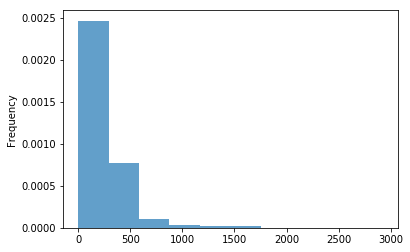

In [238]:
ax = geo_close['стоимость (руб,коп)'].plot.hist(bins=10, alpha=0.7, density=1, subplots=4)
plt.show()

In [239]:
geo_close['стоимость (руб,коп)'].describe()

count    41847.000000
mean       290.759572
std        187.334174
min          0.000000
25%        194.000000
50%        238.000000
75%        293.000000
max       2921.600000
Name: стоимость (руб,коп), dtype: float64

In [240]:
data.shape

(944567, 19)

In [241]:
geo_close.shape

(41847, 22)

In [242]:
41847 / 944567 * 100

4.430283929038384

In [243]:
geo_close['вес (гр)'].describe()

count    41847.00000
mean      1403.04213
std       2657.96968
min          1.00000
25%        100.00000
50%        442.00000
75%       1132.00000
max      20000.00000
Name: вес (гр), dtype: float64

In [312]:
geo_to_close = geo_final[geo_final["dist"] < 10]

In [313]:
geo_to_close.shape

(17480, 22)

In [315]:
17480 / 944567 * 100

1.8505833890025798

In [255]:
geo_to_close['вес (гр)'].describe()

count    27731.000000
mean      1457.222963
std       2843.520650
min          1.000000
25%         52.000000
50%        300.000000
75%       1000.000000
max      20000.000000
Name: вес (гр), dtype: float64

In [256]:
geo_to_close[geo_to_close['вес (гр)'] < 10].shape

(757, 22)

In [257]:
geo_to_close['вес (гр)'].quantile(0.9)

5000.0

In [291]:
geo_far = geo_final[geo_final["dist"] > 1500]

In [292]:
geo_far[geo_far['сумма ОЦ (руб)'] == 0].shape[0] / data.shape[0] * 100

13.368665219089806

In [293]:
geo_far.shape[0] / data.shape[0] * 100

17.864164214925992

In [276]:
geo_far['вес (гр)'].describe()

count    69076.000000
mean      1909.446320
std       2704.377243
min          0.000000
25%        300.000000
50%        850.000000
75%       2140.000000
max      20000.000000
Name: вес (гр), dtype: float64

In [266]:
geo_far.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,...,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek,from,to,dist
29,161c1ccd-68bf-4a6d-9c7e-5651dc7f76a0,2020-07-05 00:30:40.253000,111675,680012,1000.0,605.24,2840.0,2840.0,True,False,...,True,True,False,0,False,False,36,"(37.9030794, 55.7249015)","(135.117175, 48.4337532)",6152.384182
32,161c1ccd-68bf-4a6d-9c7e-5651dc7f76a0,2020-07-05 00:33:15.744000,111675,693006,1000.0,587.24,2340.0,2340.0,True,False,...,True,True,False,0,False,False,36,"(37.9030794, 55.7249015)","(142.737573, 46.9464021)",6652.398446
52,17318e3f-1de1-4ec5-95f9-e2d3377a77db,2020-07-05 00:01:46.940000,117042,655102,300.0,413.94,3440.0,3440.0,False,False,...,True,True,False,0,False,False,36,"(37.5216248, 55.5406221)","(91.3796832, 53.844053)",3390.283072
58,1731a003-3b34-426f-8153-cc457c3162ac,2020-07-05 00:00:50.604000,199397,630063,250.0,334.00,0.0,0.0,True,False,...,False,False,False,0,False,False,36,"(30.2341635, 59.9439183)","(82.8911441, 54.9941301)",3120.248963
60,16e98d9f-ced4-4d0a-8e8b-9795bfcce4cf,2020-07-05 00:02:17.411000,109387,665730,11200.0,1969.80,0.0,0.0,False,False,...,False,False,False,0,False,False,36,"(37.7387706, 55.6833434)","(101.568261, 56.1334752)",3846.660227


In [290]:
geo_far['стоимость (руб,коп)'].describe()

count    69076.000000
mean       516.997588
std        389.043838
min          0.000000
25%        310.160000
50%        418.190000
75%        595.427500
max       7416.900000
Name: стоимость (руб,коп), dtype: float64

In [308]:
geo_far['sms для получателя'].describe()

count     168739
unique         2
top        False
freq      151550
Name: sms для получателя, dtype: object

In [309]:
geo_far[geo_far['sms для получателя'] == False].shape

(151550, 22)

In [311]:
151550 / data.shape[0] * 100

16.04438859286848

In [267]:
data[data['безбланковая отправка'] == False].shape

(244118, 19)

In [275]:
data_kek = data[data['сумма ОЦ (руб)'] > 0]
data_lel = data_kek[data_kek['с объявл. ценностью'] == False]
data_lel.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,kek
34791,2510866,2020-07-06 13:04:58.178000,453839,679016,2188.0,577.04,1.0,0.0,True,0,False,False,0,False,0,0,0,0,7
34934,2510866,2020-07-06 13:07:27.388000,453839,397505,2188.0,368.04,1.0,0.0,True,0,False,False,0,False,0,0,0,0,7
37411,167e53fe-1e29-48b7-ba3e-d7f617b03a90,2020-07-06 13:45:56.514000,452511,644052,3748.0,448.04,50.0,0.0,True,0,False,False,0,False,0,0,True,True,36
39914,15c0af0d-0802-44b5-b571-8ca4b87c01d5,2020-07-06 14:48:13.640000,127540,350040,400.0,343.95,1990.0,1990.0,True,0,False,False,0,True,0,0,0,0,36
40391,1703230,2020-07-06 14:31:51.695000,197229,443124,180.0,629.08,9780.0,9780.0,False,0,True,False,0,True,0,0,0,0,7


In [288]:
geo_blits = geo_final[geo_final['ускоренное'] == True]
geo_blits['dist'].describe()

count    86548.000000
mean      2223.665059
std       2024.675265
min          0.000000
25%        722.731172
50%       1440.795495
75%       3122.020344
max      16854.127237
Name: dist, dtype: float64

In [289]:
geo_non_blits = geo_final[geo_final['ускоренное'] == False]
geo_non_blits['dist'].describe()

count    394550.000000
mean       1411.339900
std        1425.379604
min           0.000000
25%         447.101033
50%        1054.932829
75%        1808.788290
max       16898.490515
Name: dist, dtype: float64

In [294]:
geo_sms = geo_final[geo_final['sms для получателя'] == True]
geo_sms['dist'].describe()

count    46774.000000
mean      1593.261212
std       1522.325822
min          0.000000
25%        607.391684
50%       1200.483801
75%       2049.992523
max      16789.464868
Name: dist, dtype: float64

In [295]:
geo_non_sms = geo_final[geo_final['sms для получателя'] == False]
geo_non_sms['dist'].describe()

count    434324.000000
mean       1553.620617
std        1587.647978
min           0.000000
25%         492.588267
50%        1115.071093
75%        1966.874378
max       16898.490515
Name: dist, dtype: float64

In [300]:
geo_oc = geo_final[geo_final['сумма ОЦ (руб)'] > 1]
geo_f = geo_oc[geo_oc['ускоренное'] == True]
geo_f['dist'].describe()

count    14660.000000
mean      2465.139451
std       2072.337309
min          0.000000
25%        883.596983
50%       1638.219084
75%       3587.652284
max      15353.374752
Name: dist, dtype: float64

In [301]:
geo_oc = geo_final[geo_final['сумма ОЦ (руб)'] > 1]
geo_f = geo_oc[geo_oc['отметка \'Осторожно\''] == True]
geo_f['dist'].describe()

count     796.000000
mean     1552.827187
std      1371.657577
min         0.000000
25%       607.459761
50%      1176.793265
75%      2105.904868
max      6734.848665
Name: dist, dtype: float64

In [303]:
geo_oc = geo_final[geo_final['sms для получателя'] ==True]
geo_f = geo_oc[geo_oc['отметка \'Осторожно\''] == True]
geo_f['dist'].describe()

count     653.000000
mean     1522.758523
std      1438.726893
min         0.000000
25%       532.854956
50%      1164.346548
75%      1927.405892
max      6991.570962
Name: dist, dtype: float64

In [305]:
geo_nal = geo_final[geo_final['с налож. платежом'] == True]
geo_nal['dist'].describe()

count    48921.000000
mean      1844.000916
std       1686.193286
min          0.000000
25%        657.605671
50%       1330.069704
75%       2579.770260
max      16898.490515
Name: dist, dtype: float64

In [316]:
48921 / data.shape[0] * 100

5.1791985110638